# SUPER MARKET SALES PREDICTION

In [ ]:
Variable Description: 

Column 	Description
Item_Identifier	                Unique product ID
Item_Weight	                    Weight of product
Item_Fat_Content	            Whether the product is low fat or not
Item_Visibility	                The % of total display area of all products in a store allocated to the particular product
Item_Type	                    The category to which the product belongs
Item_MRP	                    Maximum Retail Price (list price) of the product
Outlet_Identifier	            Unique store ID
Outlet_Establishment_Year	    The year in which store was established
Outlet_Size	                    The size of the store in terms of ground area covered
Outlet_Location_Type            The type of city in which the store is located
Outlet_Type	                    Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales	            Sales of the product in a particular store. This is the outcome variable to be predicted.

# IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import os 
os.getcwd()

'C:\\Users\\ksvg7\\Desktop\\PGA44\\ML\\Linear Regression\\Class'

# IMPORT DATA

In [5]:
df = pd.read_csv(r"C:\Users\ksvg7\Desktop\PGA44\ML\Linear Regression\Supermarket_sales_prediction.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# UNDERSTANDING THE DATA

#### EDA for BigMart Sales Data

In [7]:
df.shape

(8523, 12)

In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Summary Statistics

In [26]:
# Numerical column Primary Analysis
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
1, Null values can be observed in Item_Weight column.
2, There are some possibility of outliers in Item_Outlet_Sales column later I will make sure by using necessary plots.
3, In Item_Visibilty column I can see 0.0 visibility for some products but sales are good which is impossible
which indicates 0.0 visibility is null values.
4, Item_Establishment_Year column can be used for knowing the age of the store which can be used for increasing the sales.

In [22]:
# Categirical Column Primary Analysis
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [28]:
cat_cols=list(df.select_dtypes(include=['object']).columns) # (OR) df.select_dtypes(include=['object']).columns.to_list()
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [30]:
cat_cols=df.select_dtypes(include='object').columns.to_list()

for i in cat_cols:
    print(i,":",df[i].unique())

Item_Identifier : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size : ['Medium' nan 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### Checking unique values for each column

In [15]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Checking Null values present are not

In [44]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Checking Null values percentage

In [20]:
(df.isnull().sum())/df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

## Null Values Treatment

In [303]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

1, Item_Weight and Outlet_Size these columns has null values.

2, As we have already seen Item_Visibility column has some null values which may required to be treated.

In [32]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [34]:
df['Outlet_Size'].fillna("Medium",inplace=True)

In [38]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [44]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [48]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Converting column Item_Visiblity values 0.0 to mean

In [310]:
df['Item_Visibility']=df['Item_Visibility'].replace(0.0, df['Item_Visibility'].mean())

# (OR) df['Item_Visibility'].replace(0.0, df['Item_Visibility'].mean(), inplace=True)

In [311]:
df['Item_Visibility']==0

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Visibility, Length: 8523, dtype: bool

## Checking for outliers in numerical variables columns.

<Axes: xlabel='Item_Weight', ylabel='Density'>

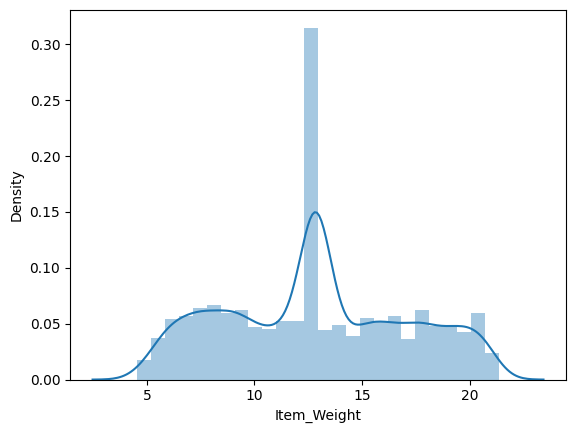

In [312]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

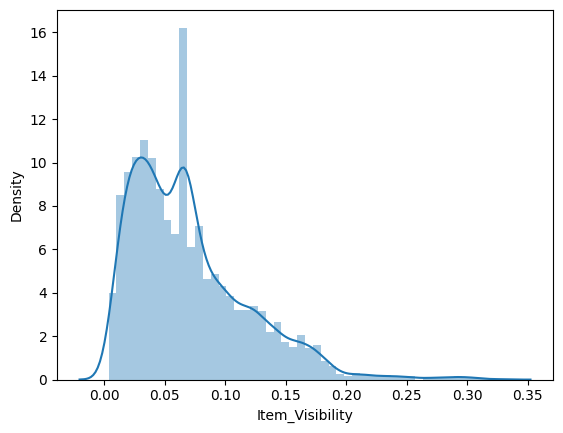

In [313]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

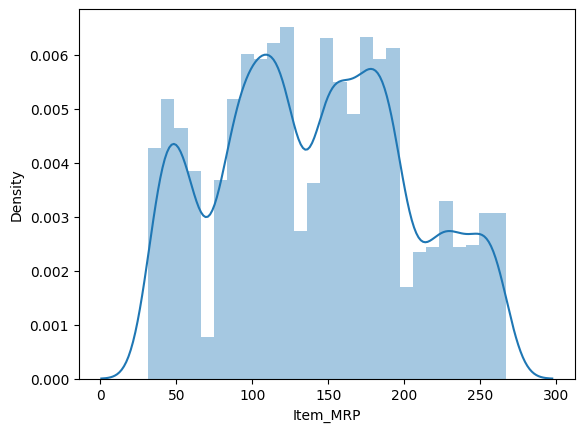

In [314]:
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

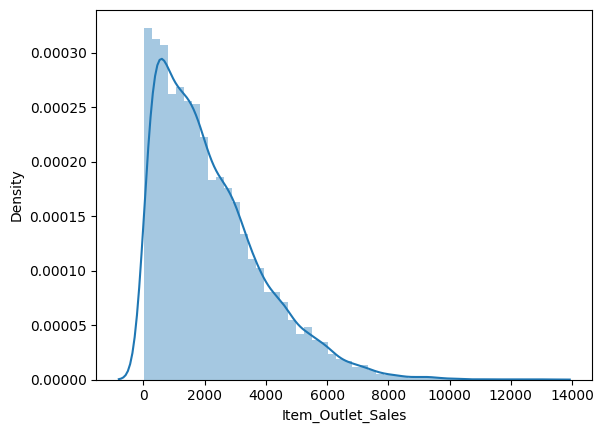

In [315]:
sns.distplot(df['Item_Outlet_Sales'])

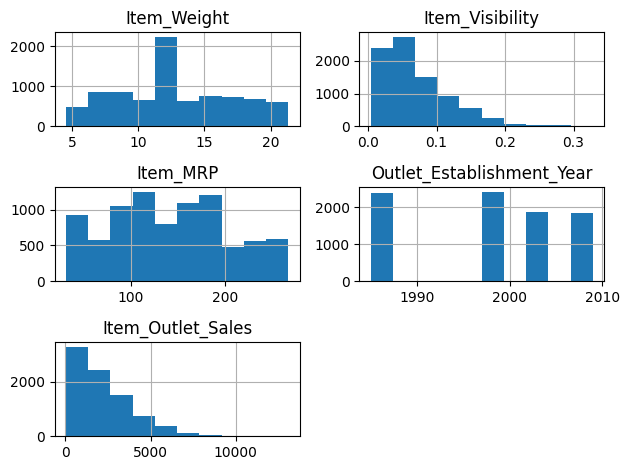

In [316]:
df.select_dtypes(include='number').hist()
plt.tight_layout()

1. 

(array([1, 2, 3]),
 [Text(1, 0, 'Item_Weight'),
  Text(2, 0, 'Item_Visibility'),
  Text(3, 0, 'Item_MRP')])

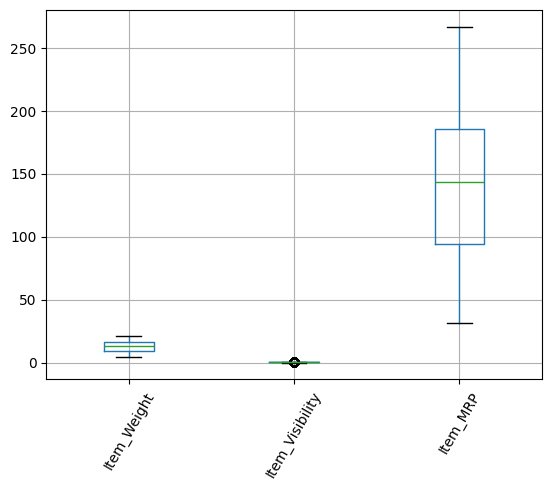

In [317]:
df.drop(['Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1).boxplot()
plt.xticks(rotation=60)

I can see there are outliers in the columns Item_Visibility and Item_Outlet_Sales.

<Axes: >

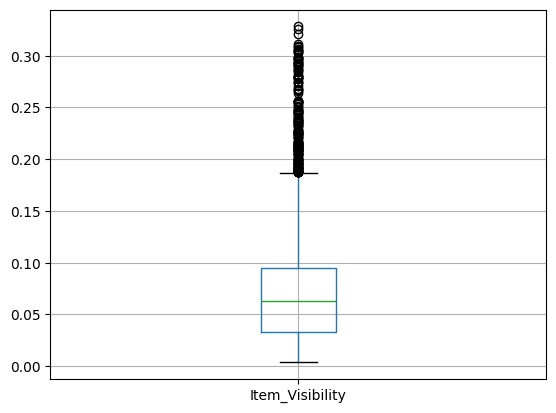

In [318]:
df[['Item_Visibility']].boxplot()

In [319]:
df['Item_Fat_Content'].replace("reg", "Regular", inplace=True)

In [320]:
df['Item_Fat_Content'].replace("LF", "Low Fat", inplace=True)
df['Item_Fat_Content'].replace("low fat", "Low Fat", inplace=True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

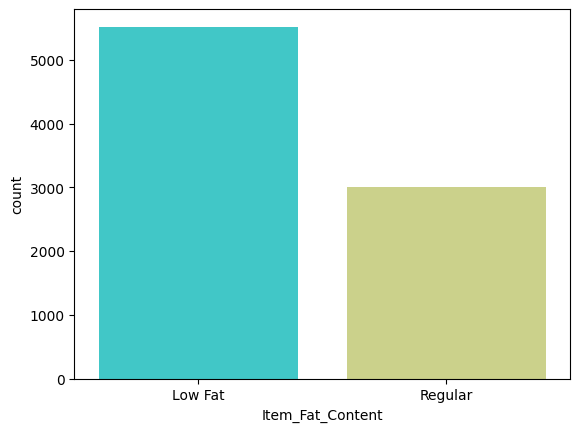

In [321]:
sns.countplot(data=df, x='Item_Fat_Content', palette="rainbow")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

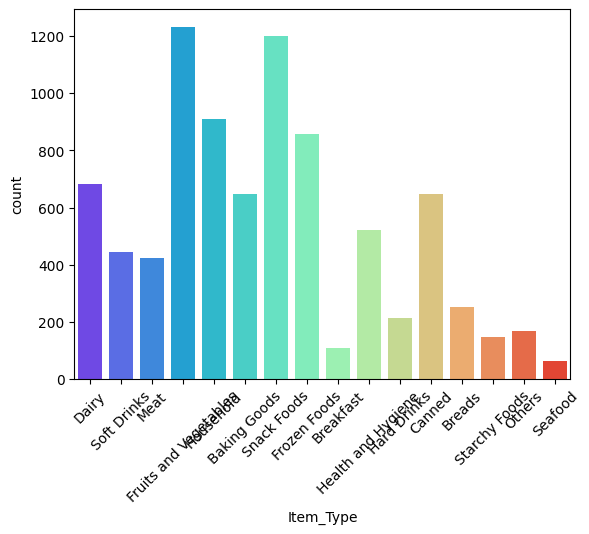

In [322]:
sns.countplot(data=df, x='Item_Type', palette="rainbow")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

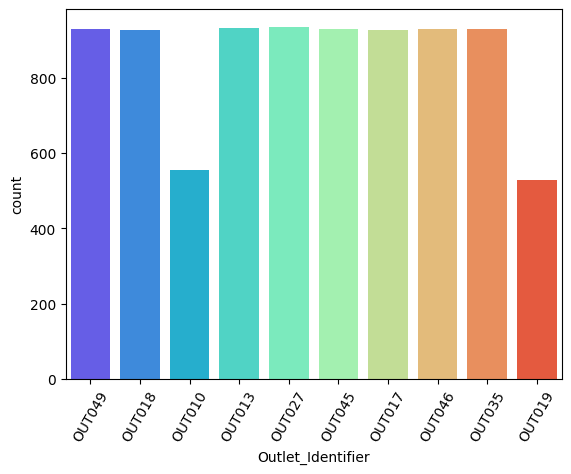

In [323]:
sns.countplot(data=df, x='Outlet_Identifier', palette='rainbow')
plt.xticks(rotation=60)

([0, 1, 2], [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

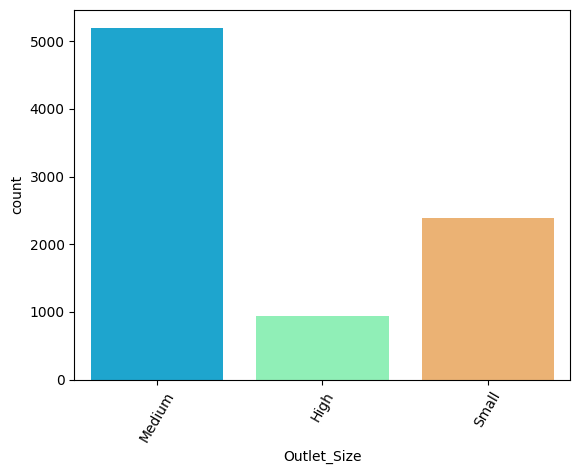

In [324]:
sns.countplot(data=df, x='Outlet_Size', palette='rainbow')
plt.xticks(rotation=60)

([0, 1, 2], [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

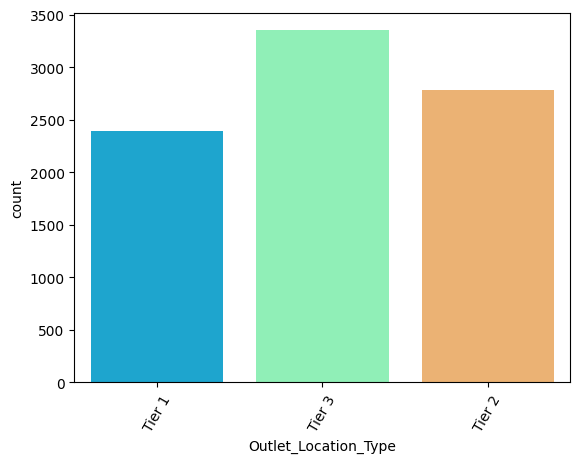

In [325]:
sns.countplot(data=df, x='Outlet_Location_Type', palette='rainbow')
plt.xticks(rotation=60)

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

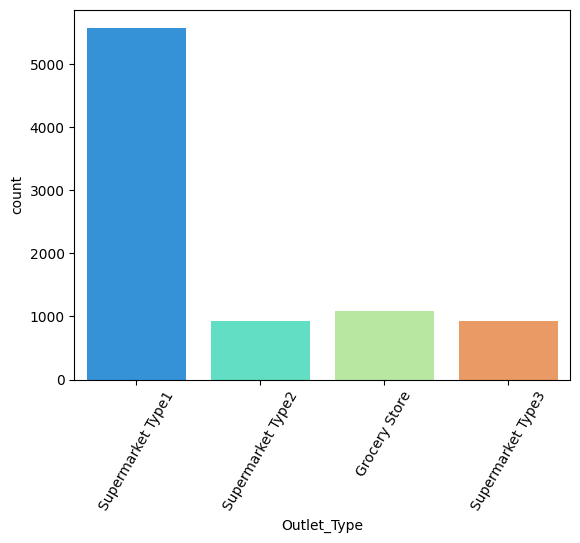

In [326]:
sns.countplot(data=df, x='Outlet_Type', palette='rainbow')
plt.xticks(rotation=60)

# Bivariant Analysis

## Numerical Vs Numerical

In [327]:
df1=df.select_dtypes(include='number')
df1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.066132,182.0950,1998,732.3800
4,8.930,0.066132,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


<Axes: >

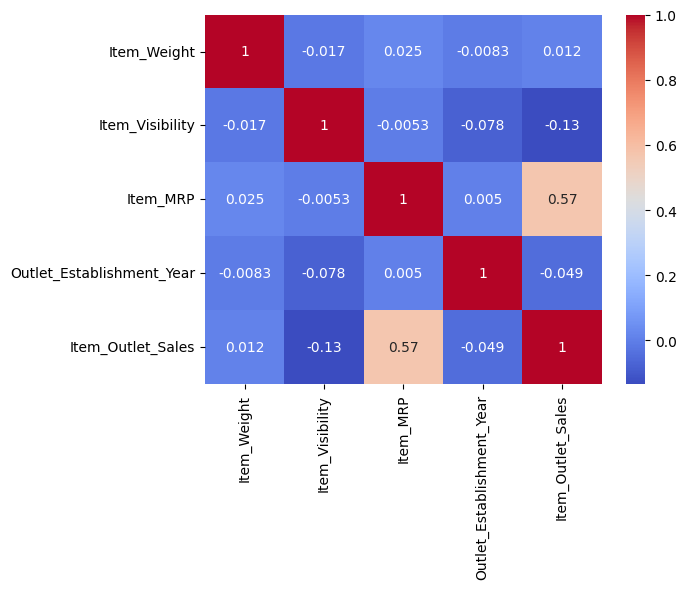

In [328]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

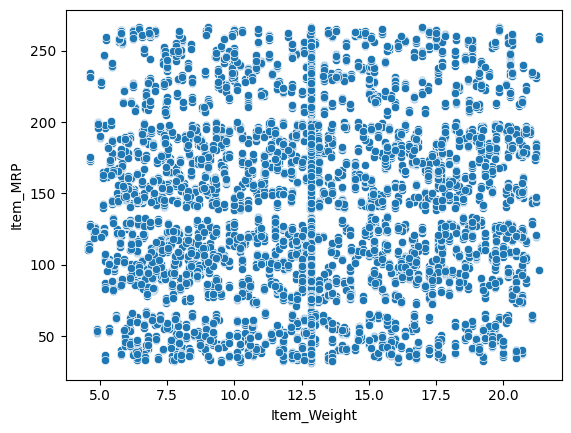

In [329]:
sns.scatterplot(x=df['Item_Weight'], y=df['Item_MRP'])

<Axes: xlabel='Item_Visibility', ylabel='Item_MRP'>

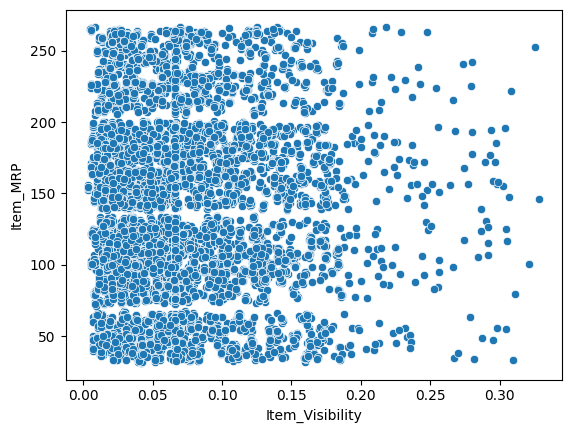

In [330]:
sns.scatterplot(x=df['Item_Visibility'], y=df['Item_MRP'])

## Categorical Vs Numerical

In [332]:
df.select_dtypes(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


<Axes: xlabel='Item_Fat_Content', ylabel='Item_MRP'>

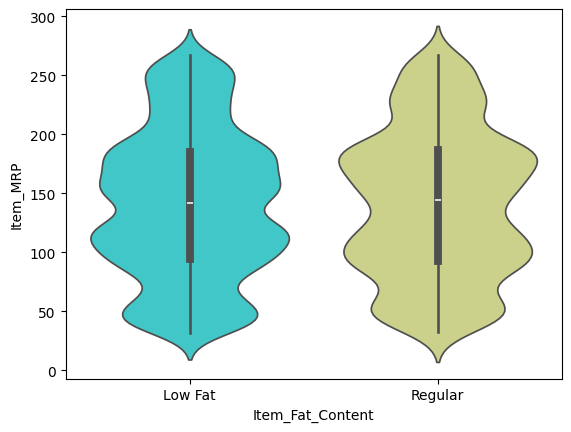

In [331]:
sns.violinplot(data=df, x='Item_Fat_Content', y='Item_MRP', palette='rainbow')

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_MRP'>

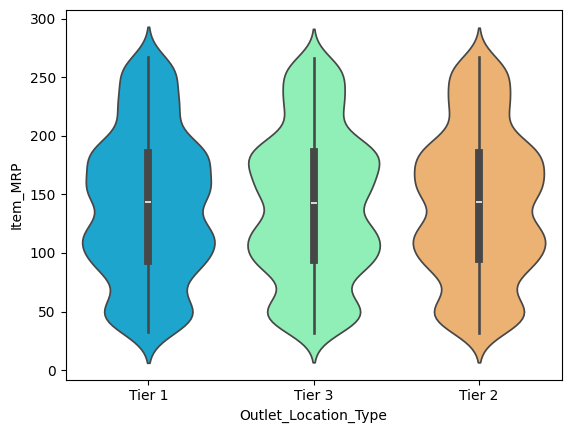

In [333]:
sns.violinplot(data=df, x='Outlet_Location_Type', y='Item_MRP', palette='rainbow')

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

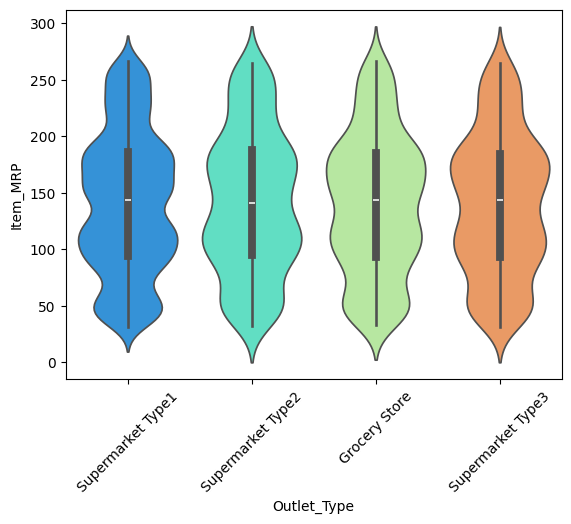

In [334]:
sns.violinplot(data=df, x='Outlet_Type', y='Item_MRP', palette='rainbow')
plt.xticks(rotation=45)

<Axes: xlabel='Outlet_Size', ylabel='Item_MRP'>

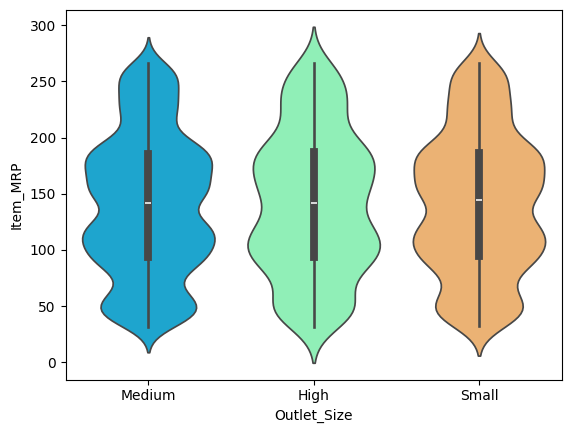

In [335]:
sns.violinplot(data=df, x='Outlet_Size', y='Item_MRP', palette='rainbow')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

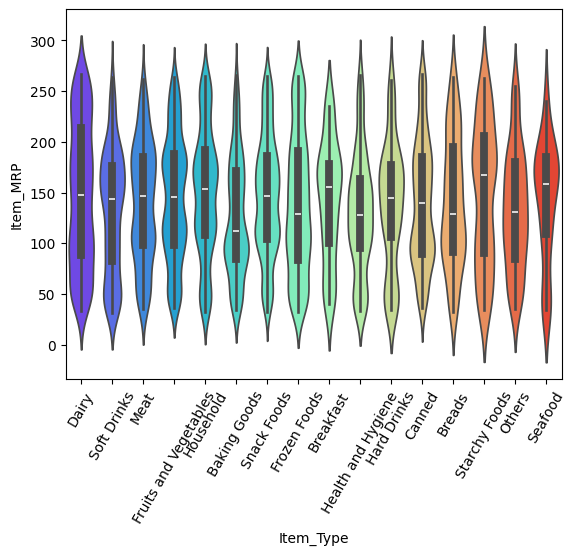

In [336]:
sns.violinplot(data=df, x='Item_Type', y='Item_MRP', palette='rainbow')
plt.xticks(rotation=60)

## Categorical Vs Categorical

In [337]:
df2=df.drop('Item_Identifier',axis=1)
df2.select_dtypes(include='object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


<Axes: xlabel='Outlet_Type', ylabel='Outlet_Identifier'>

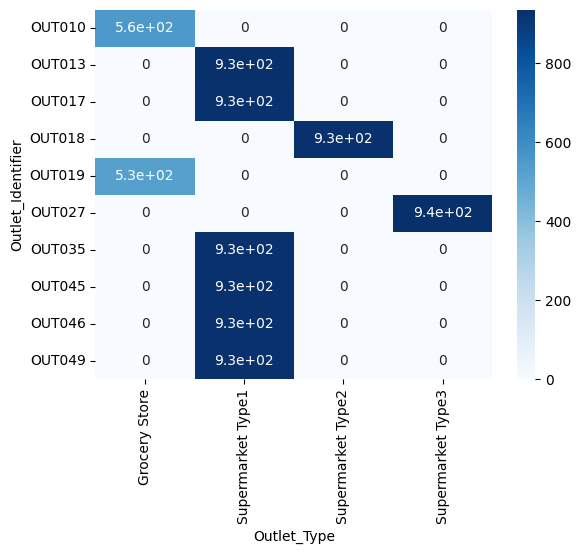

In [338]:
cross_tab5= pd.crosstab(df['Outlet_Identifier'], df['Outlet_Type'])
sns.heatmap(cross_tab5, annot=True, cmap='Blues')

<Axes: xlabel='Outlet_Type', ylabel='Outlet_Identifier'>

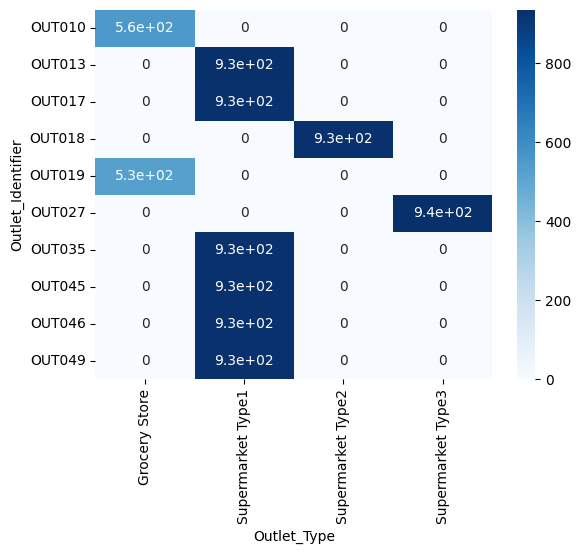

In [339]:
cross_tab4= pd.crosstab(df['Outlet_Identifier'], df['Outlet_Type'])
sns.heatmap(cross_tab4, annot=True, cmap='Blues')

<Axes: xlabel='Outlet_Type', ylabel='Outlet_Location_Type'>

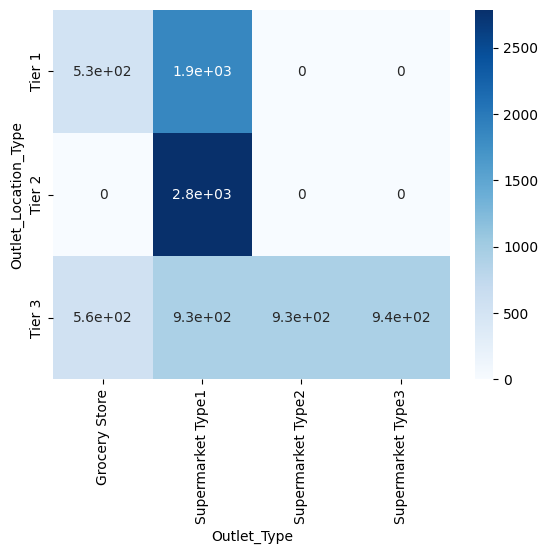

In [340]:
cross_tab3= pd.crosstab(df['Outlet_Location_Type'], df['Outlet_Type'])
sns.heatmap(cross_tab3, annot=True, cmap='Blues')

<Axes: xlabel='Outlet_Location_Type', ylabel='Outlet_Size'>

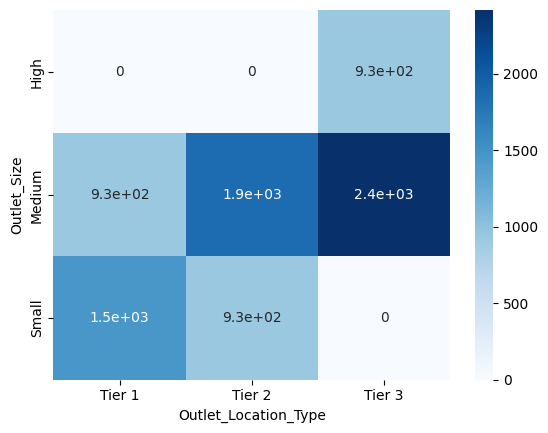

In [341]:
cross_tab2= pd.crosstab(df['Outlet_Size'], df['Outlet_Location_Type'])
sns.heatmap(cross_tab2, annot=True, cmap='Blues')

<Axes: xlabel='Outlet_Type', ylabel='Outlet_Size'>

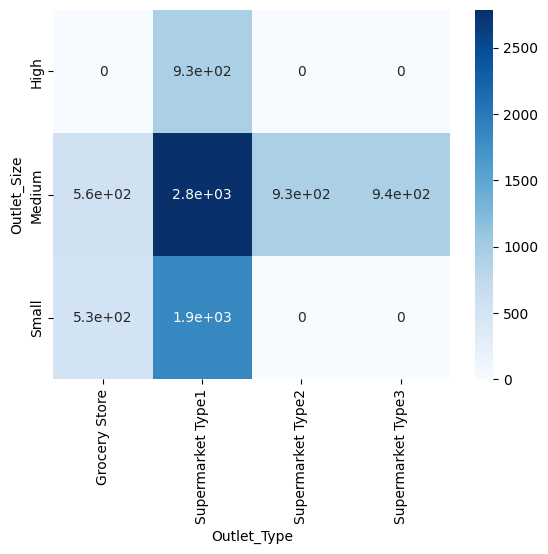

In [342]:
cross_tab1= pd.crosstab(df['Outlet_Size'], df['Outlet_Type'])
sns.heatmap(cross_tab1, annot=True, cmap='Blues')

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Type'>

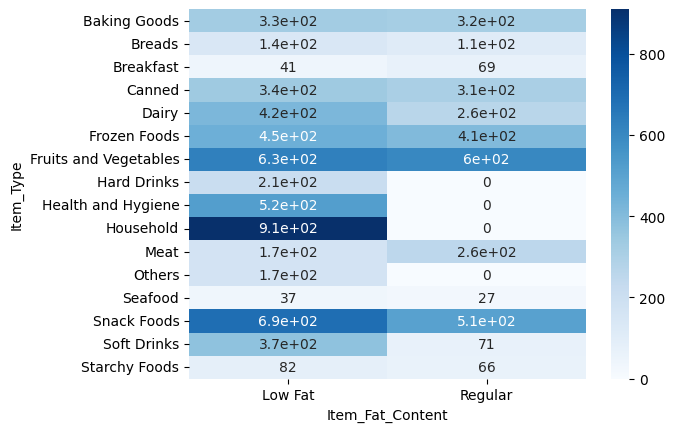

In [343]:
cross_tab= pd.crosstab(df['Item_Type'], df['Item_Fat_Content'])
sns.heatmap(cross_tab, annot=True, cmap='Blues')

# Multivariant Analysis

In [344]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Numerical Vs Numerical

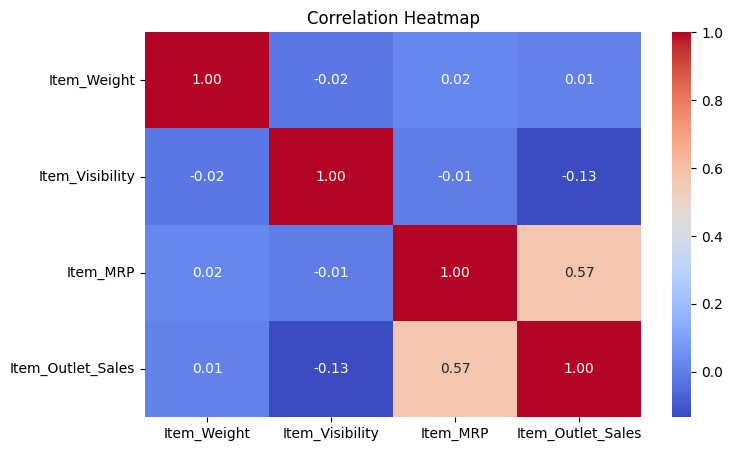

In [345]:
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
plt.figure(figsize=(8,5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

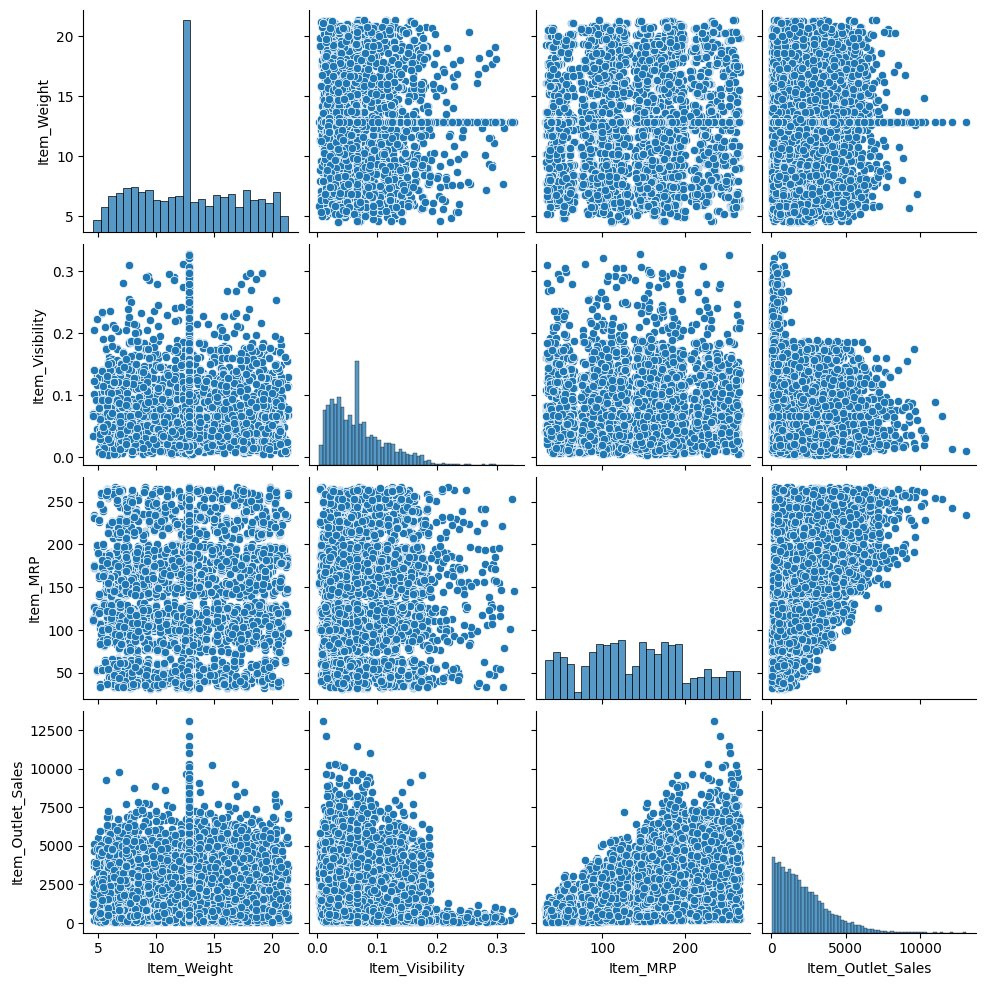

In [346]:
sns.pairplot(df[numerical_cols])
plt.show(

## Categorical Vs Numerical

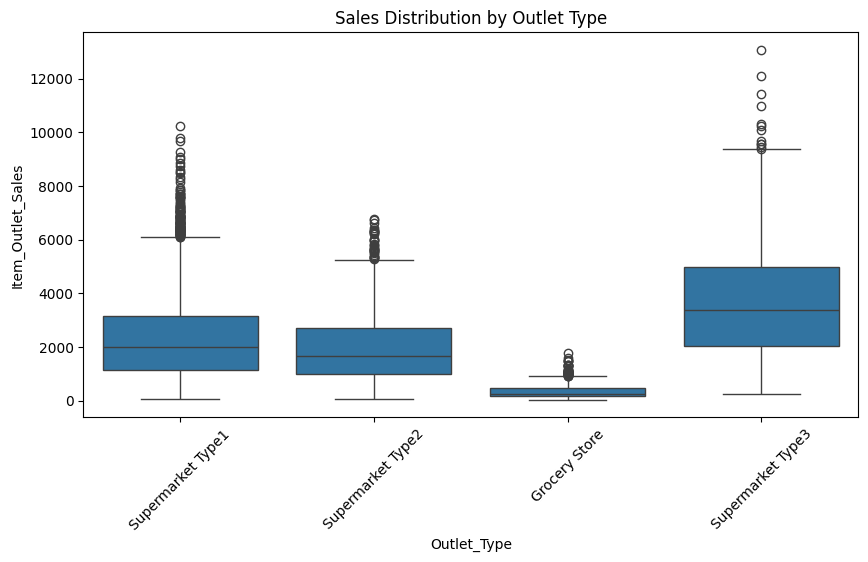

In [347]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Sales Distribution by Outlet Type")
plt.show()

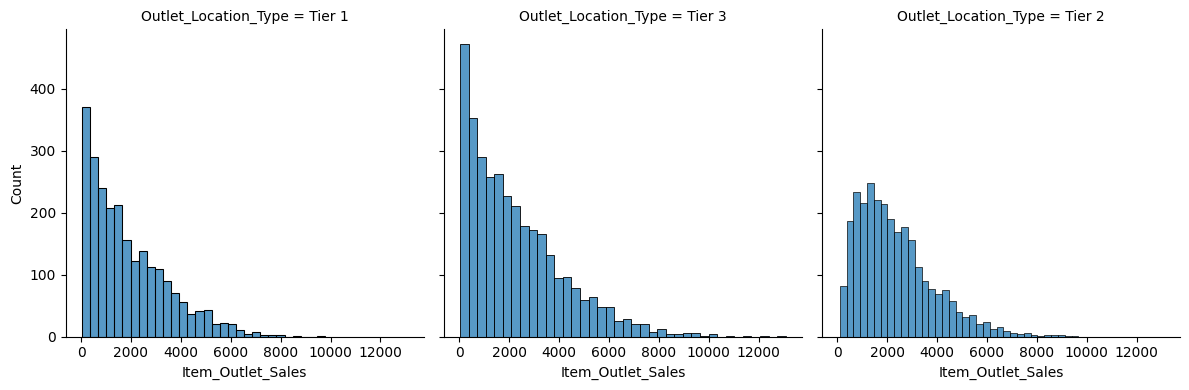

In [348]:
g = sns.FacetGrid(df, col="Outlet_Location_Type", height=4)
g.map(sns.histplot, "Item_Outlet_Sales")
plt.show()

## Categorical Vs Categorical

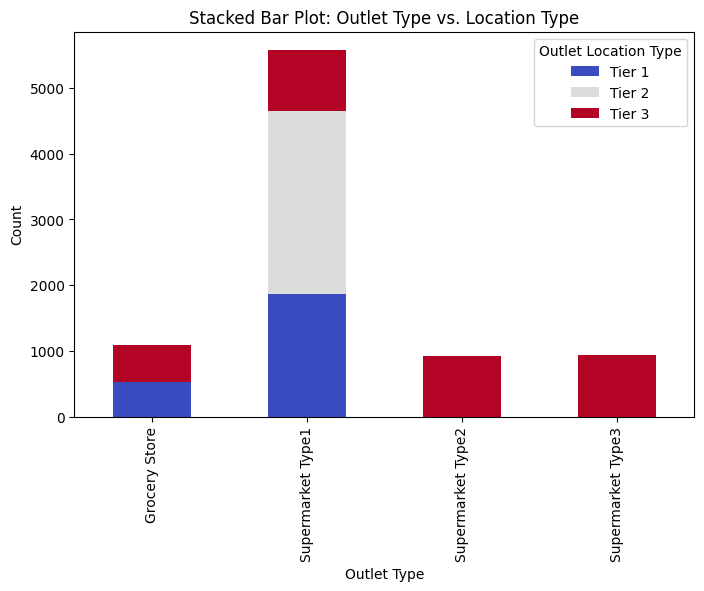

In [349]:
cross_tab = pd.crosstab(df['Outlet_Type'], df['Outlet_Location_Type'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')

plt.xlabel("Outlet Type")
plt.ylabel("Count")
plt.title("Stacked Bar Plot: Outlet Type vs. Location Type")
plt.legend(title="Outlet Location Type")
plt.show()

# Another Method to check the Multicollinearity

In [350]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
X=df.select_dtypes(include='number')
df_vif = pd.DataFrame()
df_vif['Features'] = X.columns
df_vif['VIF'] = [VIF(X, i) for i in range(len(X.columns))]
df_vif

,Features,VIF
0,Item_Weight,10.262867
1,Item_Visibility,3.152812
2,Item_MRP,9.117359
3,Outlet_Establishment_Year,17.347554
4,Item_Outlet_Sales,3.986526


In [351]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [352]:
from datetime import datetime
current_year = datetime.now().year
df['Outlet_Age']= current_year - df['Outlet_Establishment_Year']
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,27
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,38
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,23
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,21
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,16


In [353]:
df.drop('Outlet_Establishment_Year', axis=1, inplace = True)

In [354]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
X=df.select_dtypes(include='number')
df_vif = pd.DataFrame()
df_vif['Features'] = X.columns
df_vif['VIF'] = [VIF(X, i) for i in range(len(X.columns))]
df_vif

,Features,VIF
0,Item_Weight,6.894638
1,Item_Visibility,3.002056
2,Item_MRP,8.027315
3,Item_Outlet_Sales,4.010861
4,Outlet_Age,7.492934


In [355]:
# Lot of unique values which I think doesn't impact the target variable.
df.drop('Item_Identifier', axis=1, inplace=True)

In [356]:
df.drop(columns = ['Outlet_Identifier'], inplace=True)

In [357]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,16
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,27
4,8.93,Low Fat,0.066132,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,38


## Final Processing of Data to be fed into the model

In [358]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])

In [359]:
from sklearn.preprocessing import OrdinalEncoder
size = [['Small', 'Medium', 'High']]
encoder = OrdinalEncoder(categories=size)
df['Outlet_Size'] = encoder.fit_transform(df[['Outlet_Size']])

In [360]:
df['Outlet_Size'].unique

<bound method Series.unique of 0       1.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
8518    2.0
8519    1.0
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64>

In [361]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.300,0,0.016047,Dairy,249.8092,1.0,Tier 1,Supermarket Type1,3735.1380,26
1,5.920,1,0.019278,Soft Drinks,48.2692,1.0,Tier 3,Supermarket Type2,443.4228,16
2,17.500,0,0.016760,Meat,141.6180,1.0,Tier 1,Supermarket Type1,2097.2700,26
3,19.200,1,0.066132,Fruits and Vegetables,182.0950,1.0,Tier 3,Grocery Store,732.3800,27
4,8.930,0,0.066132,Household,53.8614,2.0,Tier 3,Supermarket Type1,994.7052,38
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,2.0,Tier 3,Supermarket Type1,2778.3834,38
8519,8.380,1,0.046982,Baking Goods,108.1570,1.0,Tier 2,Supermarket Type1,549.2850,23
8520,10.600,0,0.035186,Health and Hygiene,85.1224,0.0,Tier 2,Supermarket Type1,1193.1136,21
8521,7.210,1,0.145221,Snack Foods,103.1332,1.0,Tier 3,Supermarket Type2,1845.5976,16


In [362]:
df = pd.get_dummies(df, drop_first= True)

In [363]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_Age,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1.0,3735.1380,26,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,5.92,1,0.019278,48.2692,1.0,443.4228,16,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False
2,17.50,0,0.016760,141.6180,1.0,2097.2700,26,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,19.20,1,0.066132,182.0950,1.0,732.3800,27,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,8.93,0,0.066132,53.8614,2.0,994.7052,38,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False


In [364]:
df.shape

(8523, 27)

## Feature Transformations

In [365]:
# Before transformation y values
y= df['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [366]:
# Transforming Target Variable
y_trans = np.log(df['Item_Outlet_Sales'])
y_trans

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

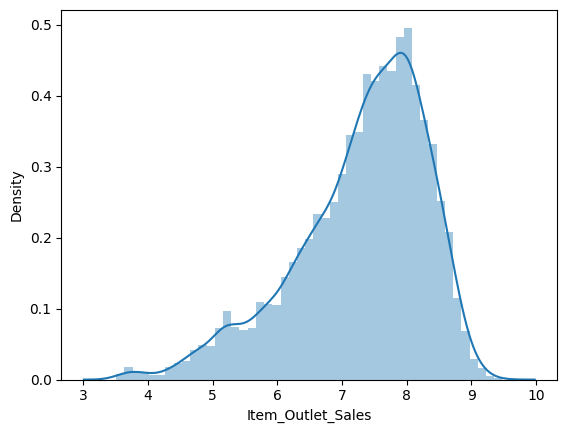

In [367]:
sns.distplot(y_trans)

In [368]:
# Feature Scaling on X
x = df.drop(columns=['Item_Outlet_Sales'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [369]:
x_scale

array([[-0.84187169, -0.73814723, -1.11135787, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.64170589,  1.35474328, -1.04506727, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.09855449, -0.73814723, -1.09673346, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53424315, -0.73814723, -0.71867224, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33644372,  1.35474328,  1.53896846, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.45963367, -0.73814723, -0.51981553, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [370]:
# Target Variable
y= df['Item_Outlet_Sales']

In [371]:
# Independent Variables
x = df.drop(columns=['Item_Outlet_Sales'])

## Modeling with ML algorithms without transformation

### Linear Regression Model

In [396]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_trans, test_size= 0.25, random_state=100)

In [373]:
x_train.shape

(6392, 26)

In [374]:
x_test.shape

(2131, 26)

In [375]:
y_train.shape

(6392,)

In [376]:
y_test.shape

(2131,)

### Assigning Linear Regression Model

In [377]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [397]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [398]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [399]:
r2 = r2_score(y_train, y_train_pred)

In [400]:
r3 = r2_score(y_test, y_test_pred)

In [401]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

In [402]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

In [403]:
print("R2_score of test data:", r3)
print("Root_Mean_Square_Error for test data is:", rmse_test)
print("Mean_Absolute_Error for test data is:", mae_test)

R2_score of test data: 0.7096376726721618
Root_Mean_Square_Error for test data is: 0.5421022856570105
Mean_Absolute_Error for test data is: 0.41864341780195397


In [404]:
print("R2_score of train data:", r2)
print("Root_Mean_Square_Error for train data is:", rmse_train)
print("Mean_Absolute_Error for train data is:", mae_train)

R2_score of train data: 0.7239620638835289
Root_Mean_Square_Error for train data is: 0.5362005129316681
Mean_Absolute_Error for train data is: 0.4164001987959069


## Modeling with ML algorithms with transformation

In [386]:
# Target Variable
#y_trans = np.log(df['Item_Outlet_Sales'])

In [387]:
# Independent Variables
#x = df.drop(columns=['Item_Outlet_Sales'])
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_scale = scaler.fit_transform(x)

In [388]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scale, y_trans, test_size= 0.25, random_state=100)

In [389]:
y_train_pred1 = lr.predict(x_train1)
y_test_pred1 = lr.predict(x_test1)

In [390]:
r21 = r2_score(y_train1, y_train_pred1)

In [391]:
r31 = r2_score(y_test1, y_test_pred1)

In [392]:
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_test_pred1))
rmse_train1 = np.sqrt(mean_squared_error(y_train1, y_train_pred1))

In [393]:
mae_test1 = mean_absolute_error(y_test1, y_test_pred1)
mae_train1 = mean_absolute_error(y_train1, y_train_pred1)

In [394]:
print("R2_score of test data:", r31)
print("Root_Mean_Square_Error for test data is:", rmse_test1)
print("Mean_Absolute_Error for test data is:", mae_test1)

R2_score of test data: -9783455.195338361
Root_Mean_Square_Error for test data is: 3146.7138847652295
Mean_Absolute_Error for test data is: 2722.050389892873


In [395]:
print("R2_score of train data:", r21)
print("Root_Mean_Square_Error for train data is:", rmse_train1)
print("Mean_Absolute_Error for train data is:", mae_train1)

R2_score of train data: -9972780.20974504
Root_Mean_Square_Error for train data is: 3222.9308305137706
Mean_Absolute_Error for train data is: 2794.433423015269
